In [7]:
# Importações para manipulação de dados
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Ferramentas do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Outras bibliotecas úteis
from collections import Counter
import time

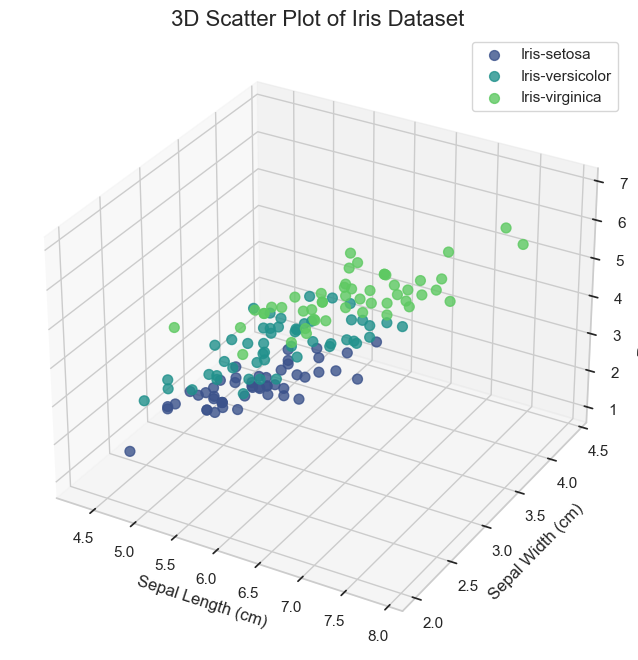

In [ ]:
# Configuração para plots do seaborn
sns.set_theme(style="whitegrid")

# %% [markdown]
# Antes de treinar os modelos, vamos visualizar a distribuição das espécies em um gráfico de dispersão 3D.
# %%
try:
    df_plot = pd.read_csv('data/Iris.csv')
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    colors = sns.color_palette('viridis', n_colors=len(df_plot['Species'].unique()))

    for species, color in zip(df_plot['Species'].unique(), colors):
        subset = df_plot[df_plot['Species'] == species]
        ax.scatter(subset['SepalLengthCm'], subset['SepalWidthCm'], subset['PetalLengthCm'],
                   c=[color], label=species, s=50, alpha=0.8)

    ax.set_xlabel('Sepal Length (cm)')
    ax.set_ylabel('Sepal Width (cm)')
    ax.set_zlabel('Petal Length (cm)')
    ax.set_title('3D Scatter Plot of Iris Dataset', fontsize=16)
    ax.legend()
    plt.savefig('iris_3d_scatter.png')
    plt.show()

except FileNotFoundError:
    print("Arquivo 'Iris.csv' não encontrado para gerar o gráfico 3D.")

# %% [markdown]
# ## Classe do KNN "Hardcore"

# %%
class KNN:
    """
    Uma implementação do classificador K-Nearest Neighbors (KNN)
    orientada a objetos, construída do zero.
    """
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict_single(x) for x in X_test]
        return np.array(predictions)

    def _predict_single(self, x):
        # Calcula a distância euclidiana para todos os pontos de treino
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        
        # Obtém os k vizinhos mais próximos
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Voto da maioria para determinar a classe
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [9]:
# %% [markdown]
# ## Carregamento e Preparação dos Dados

# %%
# Carregar o dataset a partir do arquivo CSV
try:
    df = pd.read_csv('data/Iris.csv')
    print("Amostra dos dados:")
    print(df.head())

    # Preparar os dados
    df = df.drop('Id', axis=1)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    # Dividir os dados em conjuntos de treino e teste (70% treino, 30% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"\nTamanho do conjunto de treino: {len(X_train)} amostras")
    print(f"Tamanho do conjunto de teste: {len(X_test)} amostras")

except FileNotFoundError:
    print("Erro: Arquivo 'Iris.csv' não encontrado. Certifique-se de que ele está na pasta correta.")
    df = None

Amostra dos dados:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Tamanho do conjunto de treino: 105 amostras
Tamanho do conjunto de teste: 45 amostras


Tempo de execução (Do Zero): 0.019170 segundos

Relatório de Classificação (Do Zero):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



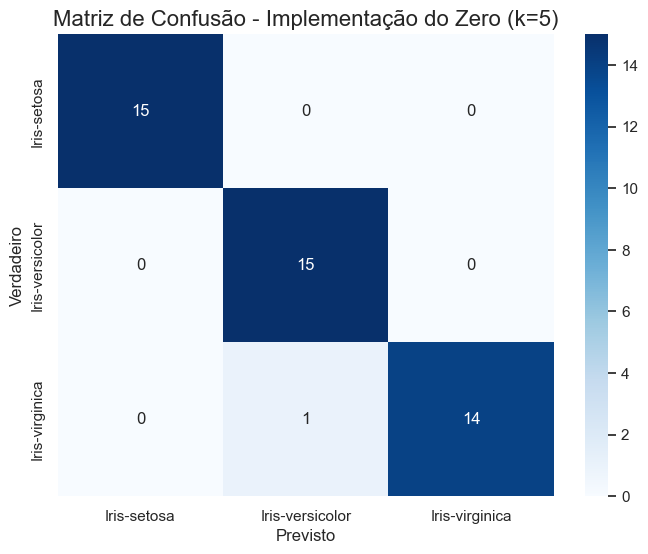

In [10]:
# %% [markdown]
# ## Parte 1: Avaliação da Implementação "Hardcore"
# 
# Agora, vamos instanciar, treinar e avaliar o nosso classificador KNN construído do zero. Usaremos `k=5` para este teste.

# %%
if df is not None:
    # Definir o valor de k
    K_VALUE = 5

    # Medição de tempo
    start_time_scratch = time.time()

    # Instanciar, treinar e prever
    model_scratch = KNN(k=K_VALUE)
    model_scratch.fit(X_train, y_train)
    y_pred_scratch = model_scratch.predict(X_test)

    end_time_scratch = time.time()
    duration_scratch = end_time_scratch - start_time_scratch

    print(f"Tempo de execução (Do Zero): {duration_scratch:.6f} segundos")

    # Métricas de Avaliação
    print("\nRelatório de Classificação (Do Zero):")
    print(classification_report(y_test, y_pred_scratch))

    # Matriz de Confusão
    cm_scratch = confusion_matrix(y_test, y_pred_scratch, labels=df['Species'].unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_scratch, annot=True, fmt='d', cmap='Blues', 
                xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
    plt.title('Matriz de Confusão - Implementação do Zero (k=5)', fontsize=16)
    plt.xlabel('Previsto', fontsize=12)
    plt.ylabel('Verdadeiro', fontsize=12)
    plt.show()

Tempo de execução (Scikit-learn): 0.008999 segundos

Relatório de Classificação (Scikit-learn):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



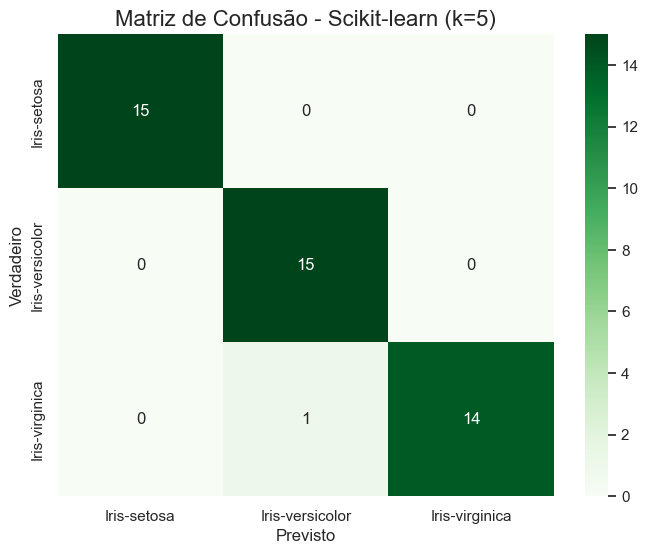

In [11]:
# %% [markdown]
# ## Parte 2: Avaliação da Implementação com Scikit-learn
# 
# Faremos agora o mesmo processo utilizando a classe `KNeighborsClassifier` da biblioteca Scikit-learn.

# %%
if df is not None:
    # Medição de tempo
    start_time_sklearn = time.time()

    # Instanciar, treinar e prever
    model_sklearn = KNeighborsClassifier(n_neighbors=K_VALUE)
    model_sklearn.fit(X_train, y_train)
    y_pred_sklearn = model_sklearn.predict(X_test)

    end_time_sklearn = time.time()
    duration_sklearn = end_time_sklearn - start_time_sklearn

    print(f"Tempo de execução (Scikit-learn): {duration_sklearn:.6f} segundos")

    # Métricas de Avaliação
    print("\nRelatório de Classificação (Scikit-learn):")
    print(classification_report(y_test, y_pred_sklearn))

    # Matriz de Confusão
    cm_sklearn = confusion_matrix(y_test, y_pred_sklearn, labels=df['Species'].unique())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens',
                xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
    plt.title('Matriz de Confusão - Scikit-learn (k=5)', fontsize=16)
    plt.xlabel('Previsto', fontsize=12)
    plt.ylabel('Verdadeiro', fontsize=12)
    plt.show()

In [12]:
# %% [markdown]
# ## Parte 3: Análise Comparativa de Desempenho
# 
# Finalmente, vamos compilar os resultados de ambos os classificadores em uma tabela para uma comparação direta.

# %%
if df is not None:
    # Obter métricas para a tabela de comparação
    accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
    report_scratch_dict = classification_report(y_test, y_pred_scratch, output_dict=True)

    accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
    report_sklearn_dict = classification_report(y_test, y_pred_sklearn, output_dict=True)

    # Criar um DataFrame para comparar as métricas
    metrics_data = {
        'Implementação': ['Do Zero', 'Scikit-learn'],
        'Acurácia': [f"{accuracy_scratch:.2%}", f"{accuracy_sklearn:.2%}"],
        'Precisão (Média)': [f"{report_scratch_dict['weighted avg']['precision']:.2f}", f"{report_sklearn_dict['weighted avg']['precision']:.2f}"],
        'Revocação (Média)': [f"{report_scratch_dict['weighted avg']['recall']:.2f}", f"{report_sklearn_dict['weighted avg']['recall']:.2f}"],
        'Tempo de Execução (s)': [f"{duration_scratch:.6f}", f"{duration_sklearn:.6f}"]
    }
    comparison_df = pd.DataFrame(metrics_data)

    print("--- Tabela Comparativa de Desempenho (k=5) ---")
    print(comparison_df.to_string(index=False))


--- Tabela Comparativa de Desempenho (k=5) ---
Implementação Acurácia Precisão (Média) Revocação (Média) Tempo de Execução (s)
      Do Zero   97.78%             0.98              0.98              0.019170
 Scikit-learn   97.78%             0.98              0.98              0.008999
